# **LCCDE: A Decision-Based Ensemble Framework for Intrusion Detection in The Internet of Vehicles**
LCCDE stands for "Decision-Based Ensemble Framework for Intrusion Detection in the Internet of Vehicles." It refers to a specific framework or approach designed to detect and prevent intrusions in the context of the Internet of Vehicles (IoV). The IoV refers to the network of interconnected vehicles that communicate with each other and with infrastructure systems to enable various services and applications.

The LCCDE framework utilizes a decision-based ensemble approach, which involves combining multiple intrusion detection techniques or models to improve the overall detection accuracy and reliability. This framework aims to identify and mitigate potential security threats or intrusions that may occur within the IoV environment, such as unauthorized access, malicious attacks, or data breaches.

By leveraging ensemble techniques, the LCCDE framework enhances the effectiveness of intrusion detection in the IoV by considering diverse perspectives and combining the strengths of different detection methods. It helps ensure the security and integrity of the IoV system, protecting vehicles, passengers, and the overall network from potential cybersecurity risks.


## **Import libraries**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
pip install catboost

In [39]:
pip install river

In [73]:
pip install tabulate

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import catboost as cbt
import xgboost as xgb
import time
from river import stream
from statistics import mode
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
import time
import matplotlib.pyplot as
from tabulate import tabulate

SyntaxError: ignored

In [41]:
df = pd.read_csv("/content/drive/My Drive/DataScience/Datascience Project/CICIDS2017_sample.csv")

In [42]:
df.Label.value_counts()

Label
BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: count, dtype: int64

# **Read the sampled CICIDS2017 dataset**

In [43]:
df = pd.read_csv("/content/drive/My Drive/DataScience/Datascience Project/CICIDS2017_sample_km.csv")

In [44]:
df.Label.value_counts()

Label
0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: count, dtype: int64

**Corresponding Attack Types:**  
0 BENIGN &emsp; 18225  
3 DoS        &emsp;   &emsp;   3042  
6 WebAttack    &emsp;      2180  
1 Bot        &emsp;  &emsp;      1966    
5 PortScan  &emsp;       1255  
2 BruteForce  &emsp;      96  
4 Infiltration  &emsp;       36  

# **Split train set and test set**

In [45]:
X = df.drop(['Label'],axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0) #shuffle=False

# **SMOTE to solve class-imbalance**

In [46]:
pd.Series(y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2       82
4       28
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000,4:1000})

In [48]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [49]:
pd.Series(y_train).value_counts()

Label
0    14569
3     2430
6     1728
1     1579
5     1024
2     1000
4     1000
Name: count, dtype: int64

# **Machine Learning (ML) model training**

Training SVM...

Performance metrics for SVM:
Accuracy: 0.8623134328358208
Confusion Matrix:
 [[3449  149    3    4    6   11   34]
 [ 149  238    0    0    0    0    0]
 [   5    0    9    0    0    0    0]
 [ 177    0    0  432    0    3    0]
 [   2    1    0    1    4    0    0]
 [   0  117    0    0    0  112    2]
 [  59    0   15    0    0    0  378]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      3656
           1       0.47      0.61      0.53       387
           2       0.33      0.64      0.44        14
           3       0.99      0.71      0.82       612
           4       0.40      0.50      0.44         8
           5       0.89      0.48      0.63       231
           6       0.91      0.84      0.87       452

    accuracy                           0.86      5360
   macro avg       0.70      0.68      0.67      5360
weighted avg       0.88      0.86      0.86      5360

Execution Time: 32

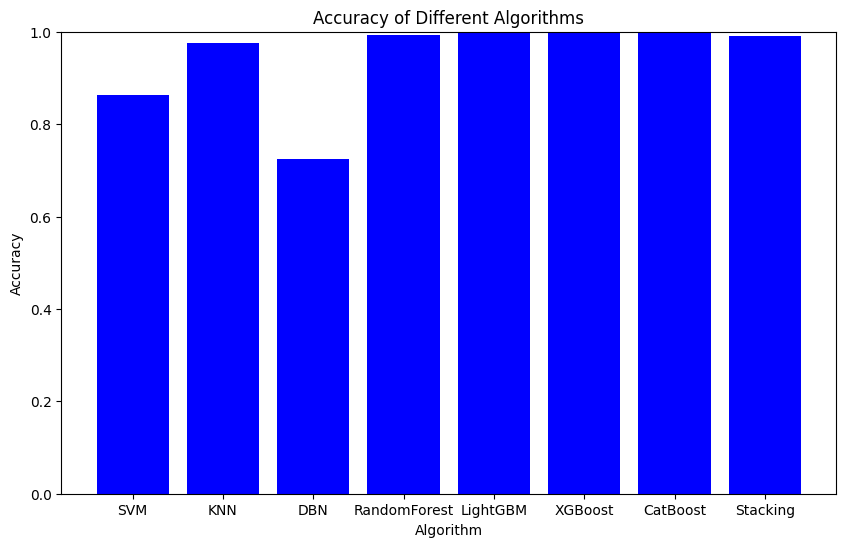

In [22]:
# Define classifiers
classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DBN': Pipeline([('rbm', BernoulliRBM(n_components=256)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=10, alpha=1e-2, solver='sgd', verbose=0))]),
    'RandomForest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier(force_row_wise=true),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

# Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=[('SVM', SVC()), ('RandomForest', RandomForestClassifier()), ('XGBoost', XGBClassifier())],
    final_estimator=MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=10, alpha=1e-2, solver='sgd', verbose=0)
)

classifiers['Stacking'] = stacking_classifier

# Lists to store accuracy values and algorithm names
accuracy_values = []
algorithm_names = []

# Iterate over classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")

    # Measure wall time
    start_wall_time = time.time()

    # Measure execution time
    start_exec_time = time.process_time()

    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Measure execution time
    end_exec_time = time.process_time()

    # Measure wall time
    end_wall_time = time.time()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store accuracy and algorithm name
    accuracy_values.append(accuracy)
    algorithm_names.append(name)

    # Print accuracy and performance metrics
    print(f"\nPerformance metrics for {name}:")
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Execution Time: {:.4f} seconds".format(end_exec_time - start_exec_time))
    print("Wall Time: {:.4f} seconds".format(end_wall_time - start_wall_time))
    print("\n" + "="*50 + "\n")

# Create accuracy graph
plt.figure(figsize=(10, 6))
plt.bar(algorithm_names, accuracy_values, color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1.0)  # Set the y-axis range from 0 to 1

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


Training SVM...

Performance metrics for SVM:
Accuracy: 0.8623134328358208
Precision: 0.8761496236056155
Recall: 0.8623134328358208
F1 Score: 0.8626314614459771
Execution Time: 44.334760427474976


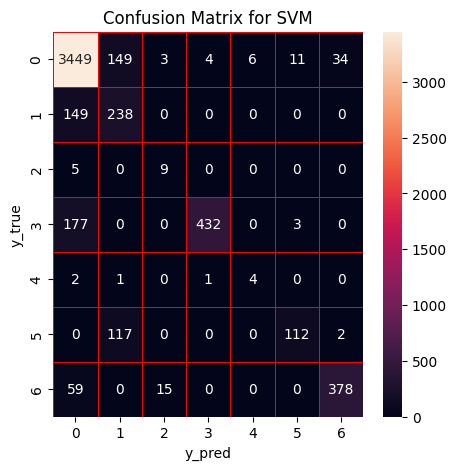

Training KNN...

Performance metrics for KNN:
Accuracy: 0.9759328358208955
Precision: 0.9769069208812627
Recall: 0.9759328358208955
F1 Score: 0.976207974769052
Execution Time: 1.4057650566101074


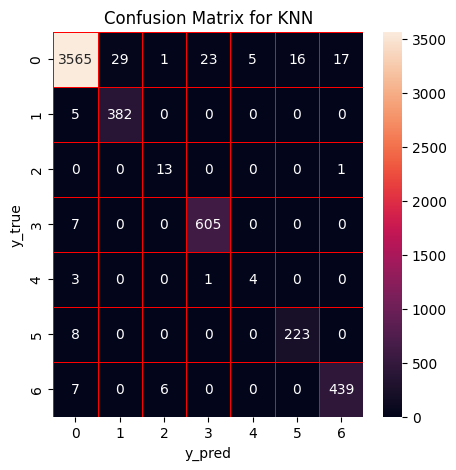

Training DBN...

Performance metrics for DBN:
Accuracy: 0.7246268656716418
Precision: 0.5929274481640788
Recall: 0.7246268656716418
F1 Score: 0.6356994946332316
Execution Time: 34.314868211746216


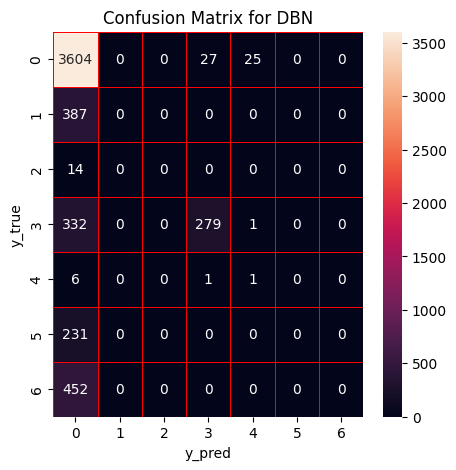

Training RandomForest...

Performance metrics for RandomForest:
Accuracy: 0.9917910447761195
Precision: 0.9918054906129542
Recall: 0.9917910447761195
F1 Score: 0.9917120509260144
Execution Time: 4.238448619842529


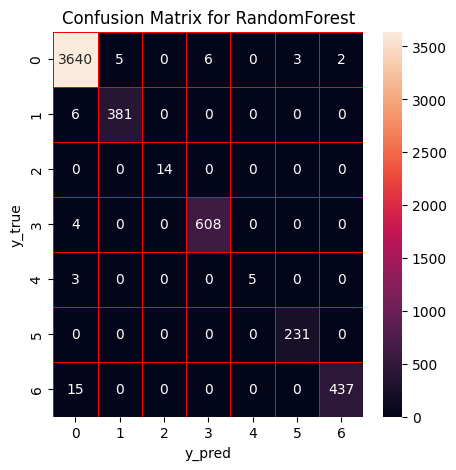

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14062
[LightGBM] [Info] Number of data points in the train set: 23330, number of used features: 63
[LightGBM] [Info] Start training from score -0.470844
[LightGBM] [Info] Start training from score -2.692948
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -2.261849
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -3.126024
[LightGBM] [Info] Start training from score -2.602775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

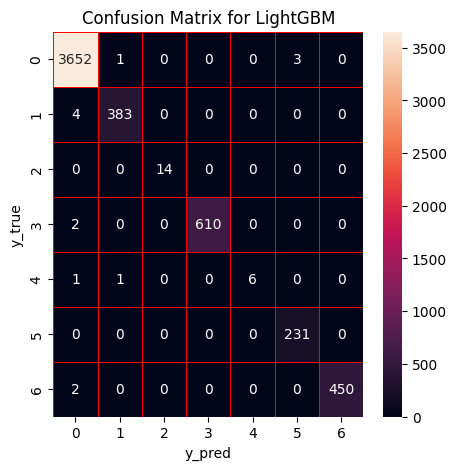

Training XGBoost...

Performance metrics for XGBoost:
Accuracy: 0.9968283582089552
Precision: 0.996835346629076
Recall: 0.9968283582089552
F1 Score: 0.9968012720791374
Execution Time: 8.106569528579712


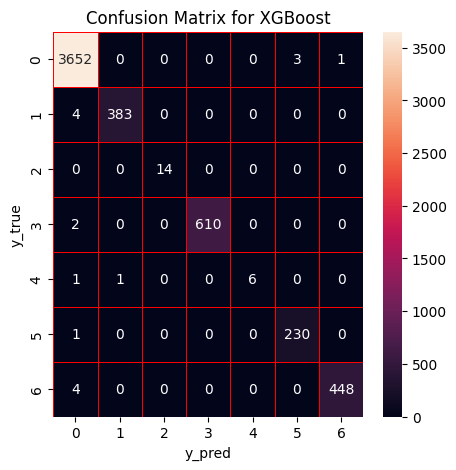

Training CatBoost...

Performance metrics for CatBoost:
Accuracy: 0.996455223880597
Precision: 0.9964597599681456
Recall: 0.996455223880597
F1 Score: 0.9963911395844551
Execution Time: 144.12777829170227


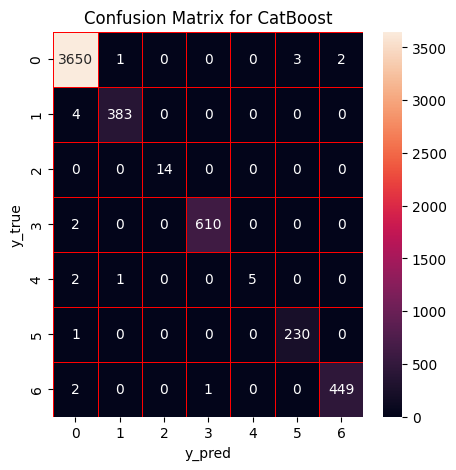

Training Stacking...

Performance metrics for Stacking:
Accuracy: 0.9899253731343284
Precision: 0.9916800039527144
Recall: 0.9899253731343284
F1 Score: 0.9903898988648198
Execution Time: 213.2637276649475


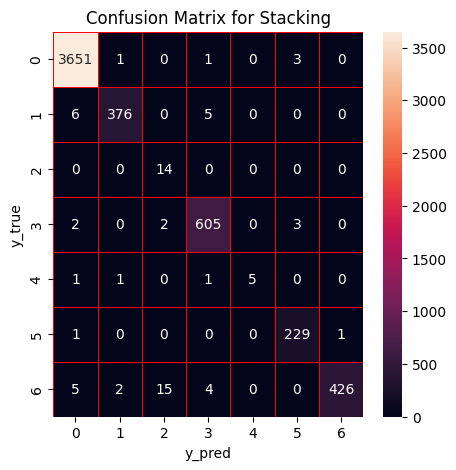


Results:

SVM:
Accuracy: 0.8623134328358208
Precision: 0.8761496236056155
Recall: 0.8623134328358208
F1 Score: 0.8626314614459771
Execution Time: 44.334760427474976

KNN:
Accuracy: 0.9759328358208955
Precision: 0.9769069208812627
Recall: 0.9759328358208955
F1 Score: 0.976207974769052
Execution Time: 1.4057650566101074

DBN:
Accuracy: 0.7246268656716418
Precision: 0.5929274481640788
Recall: 0.7246268656716418
F1 Score: 0.6356994946332316
Execution Time: 34.314868211746216

RandomForest:
Accuracy: 0.9917910447761195
Precision: 0.9918054906129542
Recall: 0.9917910447761195
F1 Score: 0.9917120509260144
Execution Time: 4.238448619842529

LightGBM:
Accuracy: 0.9973880597014926
Precision: 0.9973955902335159
Recall: 0.9973880597014926
F1 Score: 0.9973618723900644
Execution Time: 6.652766227722168

XGBoost:
Accuracy: 0.9968283582089552
Precision: 0.996835346629076
Recall: 0.9968283582089552
F1 Score: 0.9968012720791374
Execution Time: 8.106569528579712

CatBoost:
Accuracy: 0.996455223880597
Pr

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Define classifiers
classifiers = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DBN': Pipeline([('rbm', BernoulliRBM(n_components=256)),
                     ('clf', MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=10, alpha=1e-2, solver='sgd', verbose=0))]),
    'RandomForest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'Stacking': StackingClassifier(
        estimators=[('SVM', SVC()), ('RandomForest', RandomForestClassifier()), ('XGBoost', XGBClassifier())],
        final_estimator=MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=10, alpha=1e-2, solver='sgd', verbose=0)
    )
}

# Results dictionary to store evaluation metrics
results = {}

# Loop through classifiers
for name, clf in classifiers.items():
    print(f"Training {name}...")

    # Measure execution time
    start_time = time.time()

    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Measure execution time
    end_time = time.time()

    # Evaluate and store results
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results in the dictionary
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Execution Time': end_time - start_time
    }

    # Print and visualize results
    print(f"\nPerformance metrics for {name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Execution Time:", end_time - start_time)

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    f, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm, annot=True, linewidth=0.5, linecolor="red", fmt=".0f", ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

# Print the results dictionary
print("\nResults:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


In [50]:
# Find the best-performing algorithm
best_model_idx = accuracies.index(max(accuracies))
best_model_name = model_names[best_model_idx]
best_accuracy = accuracies[best_model_idx]

# Print the results
print(f"The best-performing algorithm is: {best_model_name}")
print("Accuracy:", best_accuracy)

The best-performing algorithm is: LGBMClassifier
Accuracy: 0.9973880597014926


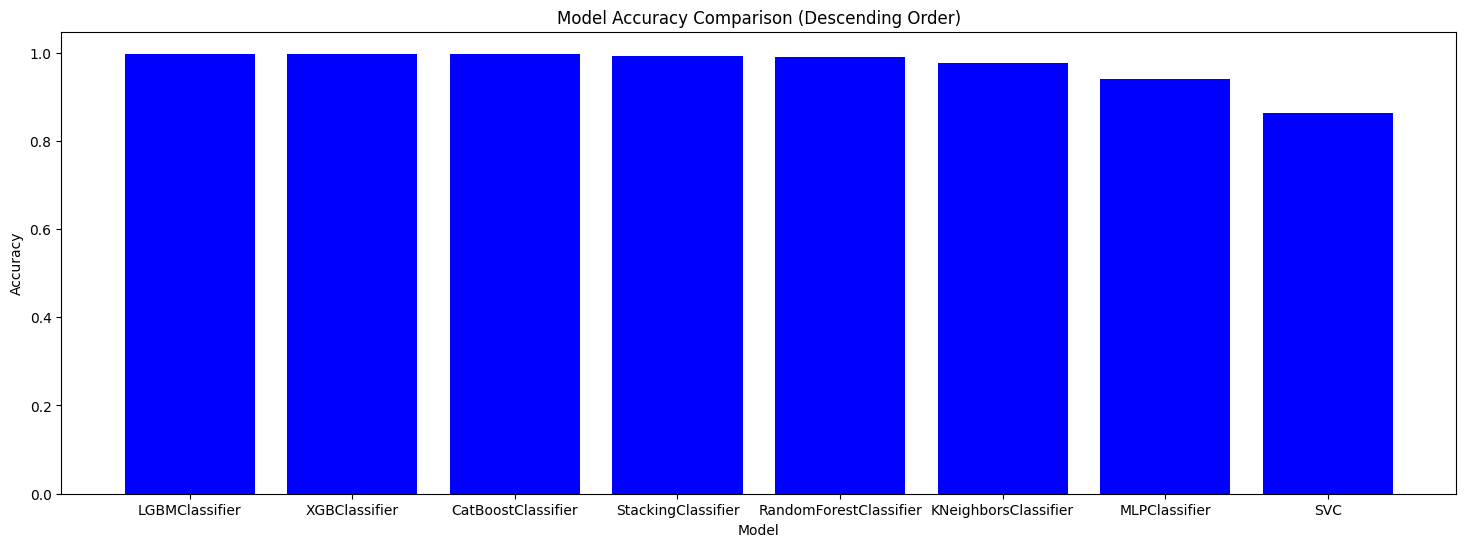

LGBMClassifier: Accuracy = 0.9973880597014926
XGBClassifier: Accuracy = 0.9968283582089552
CatBoostClassifier: Accuracy = 0.996455223880597
StackingClassifier: Accuracy = 0.9929104477611941
RandomForestClassifier: Accuracy = 0.9895522388059701
KNeighborsClassifier: Accuracy = 0.9759328358208955
MLPClassifier: Accuracy = 0.9406716417910448
SVC: Accuracy = 0.8623134328358208


In [51]:
# Sort models and accuracies in descending order
sorted_models_accuracies = sorted(zip(model_names, accuracies), key=lambda x: x[1], reverse=True)
sorted_model_names, sorted_accuracies = zip(*sorted_models_accuracies)

# Set the figure size
plt.figure(figsize=(18, 6))

# Plot bar chart with increased horizontal and vertical lengths
plt.bar(sorted_model_names, sorted_accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Descending Order)')

# Show the plot
plt.show()

# Print the results
for model, accuracy in sorted_models_accuracies:
    print(f"{model}: Accuracy = {accuracy}")


# **Proposed ensemble model: Leader Class and Confidence Decision Ensemble (LCCDE)**


LCCDE aims to achieve optimal model performance by identifying the best-performing base ML model with the highest prediction confidence for each class.

In [53]:
lg = lgb.LGBMClassifier()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of LightGBM: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of LightGBM: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of LightGBM: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of LightGBM: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of LightGBM for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
lg_f1=f1_score(y_test, y_pred, average=None)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14084
[LightGBM] [Info] Number of data points in the train set: 23330, number of used features: 63
[LightGBM] [Info] Start training from score -0.470844
[LightGBM] [Info] Start training from score -2.692948
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -2.261849
[LightGBM] [Info] Start training from score -3.149740
[LightGBM] [Info] Start training from score -3.126024
[LightGBM] [Info] Start training from score -2.602775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [55]:
xg = xgb.XGBClassifier()

X_train_x = X_train.values
X_test_x = X_test.values

xg.fit(X_train_x, y_train)

y_pred = xg.predict(X_test_x)
print(classification_report(y_test,y_pred))
print("Accuracy of XGBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of XGBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of XGBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of XGBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of XGBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
xg_f1=f1_score(y_test, y_pred, average=None)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.75      0.86         8
           5       0.99      1.00      0.99       231
           6       1.00      1.00      1.00       452

    accuracy                           1.00      5360
   macro avg       1.00      0.96      0.98      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of XGBoost: 0.9972014925373134
Precision of XGBoost: 0.9972061935686838
Recall of XGBoost: 0.9972014925373134
Average F1 of XGBoost: 0.9971752987796951
F1 of XGBoost for each type of attack: [0.99808639 0.99222798 1.         0.99836601 0.85714286 0.99137931
 0.99778271]


In [56]:
cb = cbt.CatBoostClassifier(verbose=0,boosting_type='Plain')
#cb = cbt.CatBoostClassifier()

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy of CatBoost: "+ str(accuracy_score(y_test, y_pred)))
print("Precision of CatBoost: "+ str(precision_score(y_test, y_pred, average='weighted')))
print("Recall of CatBoost: "+ str(recall_score(y_test, y_pred, average='weighted')))
print("Average F1 of CatBoost: "+ str(f1_score(y_test, y_pred, average='weighted')))
print("F1 of CatBoost for each type of attack: "+ str(f1_score(y_test, y_pred, average=None)))
cb_f1=f1_score(y_test, y_pred, average=None)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3656
           1       0.99      0.99      0.99       387
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00       612
           4       1.00      0.50      0.67         8
           5       0.99      1.00      0.99       231
           6       1.00      0.99      0.99       452

    accuracy                           1.00      5360
   macro avg       1.00      0.92      0.95      5360
weighted avg       1.00      1.00      1.00      5360

Accuracy of CatBoost: 0.9957089552238806
Precision of CatBoost: 0.9957139289583087
Recall of CatBoost: 0.9957089552238806
Average F1 of CatBoost: 0.9955858442404024
F1 of CatBoost for each type of attack: [0.99726627 0.99094437 1.         0.99509804 0.66666667 0.99137931
 0.9944629 ]


# **Find the best-performing (leading) model for each type of attack among the three ML models**

In [57]:
# Leading model list for each class
model=[]
for i in range(len(lg_f1)):
    if max(lg_f1[i],xg_f1[i],cb_f1[i]) == lg_f1[i]:
        model.append(lg)
    elif max(lg_f1[i],xg_f1[i],cb_f1[i]) == xg_f1[i]:
        model.append(xg)
    else:
        model.append(cb)

In [58]:
model

[XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               ena

# **LCCDE Prediction**

In [59]:
def LCCDE(X_test, y_test, m1, m2, m3):
    i = 0
    t = []
    m = []
    yt = []
    yp = []
    l = []
    pred_l = []
    pro_l = []

    # For each class (normal or a type of attack), find the leader model
    for xi, yi in stream.iter_pandas(X_test, y_test):

        xi2=np.array(list(xi.values()))
        y_pred1 = m1.predict(xi2.reshape(1, -1))      # model 1 (LightGBM) makes a prediction on text sample xi
        y_pred1 = int(y_pred1[0])
        y_pred2 = m2.predict(xi2.reshape(1, -1))      # model 2 (XGBoost) makes a prediction on text sample xi
        y_pred2 = int(y_pred2[0])
        y_pred3 = m3.predict(xi2.reshape(1, -1))      # model 3 (Catboost) makes a prediction on text sample xi
        y_pred3 = int(y_pred3[0])

        p1 = m1.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 1
        p2 = m2.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 2
        p3 = m3.predict_proba(xi2.reshape(1, -1))     # The prediction probability (confidence) list of model 3

        # Find the highest prediction probability among all classes for each ML model
        y_pred_p1 = np.max(p1)
        y_pred_p2 = np.max(p2)
        y_pred_p3 = np.max(p3)

        if y_pred1 == y_pred2 == y_pred3: # If the predicted classes of all the three models are the same
            y_pred = y_pred1 # Use this predicted class as the final predicted class

        elif y_pred1 != y_pred2 != y_pred3: # If the predicted classes of all the three models are different
            # For each prediction model, check if the predicted class’s original ML model is the same as its leader model
            if model[y_pred1]==m1: # If they are the same and the leading model is model 1 (LightGBM)
                l.append(m1)
                pred_l.append(y_pred1) # Save the predicted class
                pro_l.append(y_pred_p1) # Save the confidence

            if model[y_pred2]==m2: # If they are the same and the leading model is model 2 (XGBoost)
                l.append(m2)
                pred_l.append(y_pred2)
                pro_l.append(y_pred_p2)

            if model[y_pred3]==m3: # If they are the same and the leading model is model 3 (CatBoost)
                l.append(m3)
                pred_l.append(y_pred3)
                pro_l.append(y_pred_p3)

            if len(l)==0: # Avoid empty probability list
                pro_l=[y_pred_p1,y_pred_p2,y_pred_p3]

            elif len(l)==1: # If only one pair of the original model and the leader model for each predicted class is the same
                y_pred=pred_l[0] # Use the predicted class of the leader model as the final prediction class

            else: # If no pair or multiple pairs of the original prediction model and the leader model for each predicted class are the same
                max_p = max(pro_l) # Find the highest confidence

                # Use the predicted class with the highest confidence as the final prediction class
                if max_p == y_pred_p1:
                    y_pred = y_pred1
                elif max_p == y_pred_p2:
                    y_pred = y_pred2
                else:
                    y_pred = y_pred3

        else: # If two predicted classes are the same and the other one is different
            n = mode([y_pred1,y_pred2,y_pred3]) # Find the predicted class with the majority vote
            y_pred = model[n].predict(xi2.reshape(1, -1)) # Use the predicted class of the leader model as the final prediction class
            y_pred = int(y_pred[0])

        yt.append(yi)
        yp.append(y_pred) # Save the predicted classes for all tested samples
    return yt, yp

In [60]:
%%time
# Implementing LCCDE
yt, yp = LCCDE(X_test, y_test, m1 = lg, m2 = xg, m3 = cb)

CPU times: user 1min 29s, sys: 1.83 s, total: 1min 31s
Wall time: 1min 3s


In [61]:
# The performance of the proposed lCCDE model
print("Accuracy of LCCDE: "+ str(accuracy_score(yt, yp)))
print("Precision of LCCDE: "+ str(precision_score(yt,
                                                  yp, average='weighted')))
print("Recall of LCCDE: "+ str(recall_score(yt, yp, average='weighted')))
print("Average F1 of LCCDE: "+ str(f1_score(yt, yp, average='weighted')))
print("F1 of LCCDE for each type of attack: "+ str(f1_score(yt, yp, average=None)))

Accuracy of LCCDE: 0.9968283582089552
Precision of LCCDE: 0.9968351356243143
Recall of LCCDE: 0.9968283582089552
Average F1 of LCCDE: 0.9968013032165239
F1 of LCCDE for each type of attack: [0.99781421 0.99092088 1.         0.997543   0.85714286 0.99137931
 0.99778271]


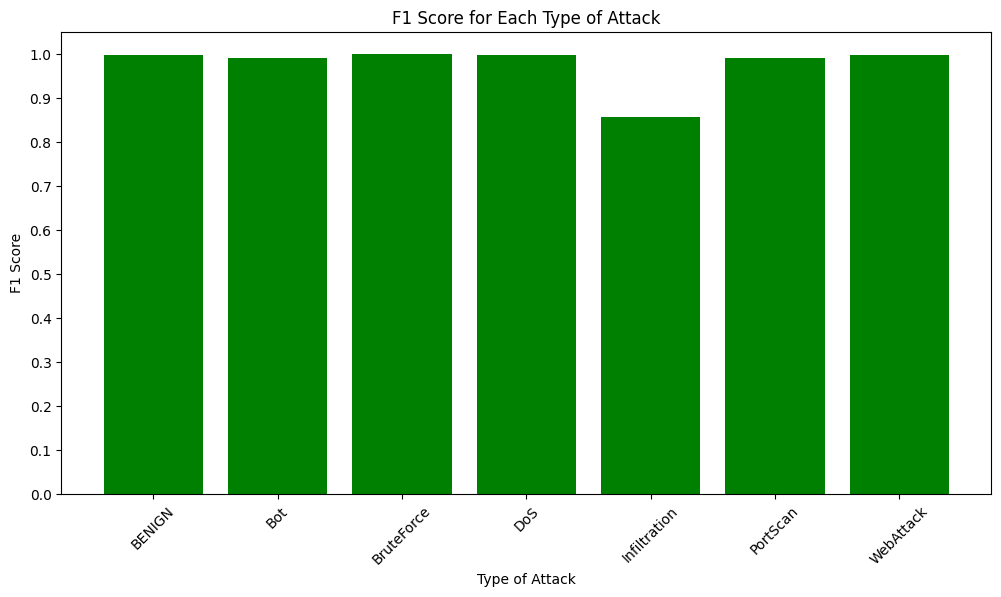

In [75]:
# Assuming yt and yp are your true labels and predicted labels, respectively
f1_scores = f1_score(yt, yp, average=None)

# Define corresponding attack names
attack_names = {
    0: 'BENIGN',
    1: 'Bot',
    2: 'BruteForce',
    3: 'DoS',
    4: 'Infiltration',
    5: 'PortScan',
    6: 'WebAttack'
}

# Get the unique labels (types of attacks)
attack_labels = sorted(set(yt))

# Map numeric labels to corresponding attack names
attack_labels_names = [attack_names[label] for label in attack_labels]

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
plt.bar(attack_labels_names, f1_scores, color='green')
plt.xlabel('Type of Attack')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Type of Attack')

# Set y-axis ticks from 0.0 to 1.0 in increments of 0.1
plt.yticks(np.arange(0.0, 1.1, 0.1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# **Comparison: The F1-scores for Three base model**

In [66]:
# Comparison: The F1-scores for each base model
print("F1 of LightGBM for each type of attack: "+ str(lg_f1))
print("F1 of XGBoost for each type of attack: "+ str(xg_f1))
print("F1 of CatBoost for each type of attack: "+ str(cb_f1))

F1 of LightGBM for each type of attack: [0.99794998 0.99094437 1.         0.997543   0.85714286 0.99354839
 0.99778271]
F1 of XGBoost for each type of attack: [0.99808639 0.99222798 1.         0.99836601 0.85714286 0.99137931
 0.99778271]
F1 of CatBoost for each type of attack: [0.99726627 0.99094437 1.         0.99509804 0.66666667 0.99137931
 0.9944629 ]


In [69]:
# F1 scores for each type of attack
lg_f1 = [0.99794998, 0.99094437, 1.0, 0.997543, 0.85714286, 0.99354839, 0.99778271]
xg_f1 = [0.99808639, 0.99222798, 1.0, 0.99836601, 0.85714286, 0.99137931, 0.99778271]
cb_f1 = [0.99726627, 0.99094437, 1.0, 0.99509804, 0.66666667, 0.99137931, 0.9944629]

# Corresponding attack names
attack_names = {
    0: 'BENIGN',
    1: 'Bot',
    2: 'BruteForce',
    3: 'DoS',
    4: 'Infiltration',
    5: 'PortScan',
    6: 'WebAttack'
}

# Attack types
attack_types = [attack_names[i] for i in range(len(attack_names))]

# Create a dictionary with the data
data = {
    'Attack Type': attack_types,
    'F1 (LightGBM)': lg_f1,
    'F1 (XGBoost)': xg_f1,
    'F1 (CatBoost)': cb_f1
}

# Convert the dictionary to a table
table = tabulate(data, headers='keys', tablefmt='pretty')

# Print the table
print(table)


+--------------+---------------+--------------+---------------+
| Attack Type  | F1 (LightGBM) | F1 (XGBoost) | F1 (CatBoost) |
+--------------+---------------+--------------+---------------+
|    BENIGN    |  0.99794998   |  0.99808639  |  0.99726627   |
|     Bot      |  0.99094437   |  0.99222798  |  0.99094437   |
|  BruteForce  |      1.0      |     1.0      |      1.0      |
|     DoS      |   0.997543    |  0.99836601  |  0.99509804   |
| Infiltration |  0.85714286   |  0.85714286  |  0.66666667   |
|   PortScan   |  0.99354839   |  0.99137931  |  0.99137931   |
|  WebAttack   |  0.99778271   |  0.99778271  |   0.9944629   |
+--------------+---------------+--------------+---------------+


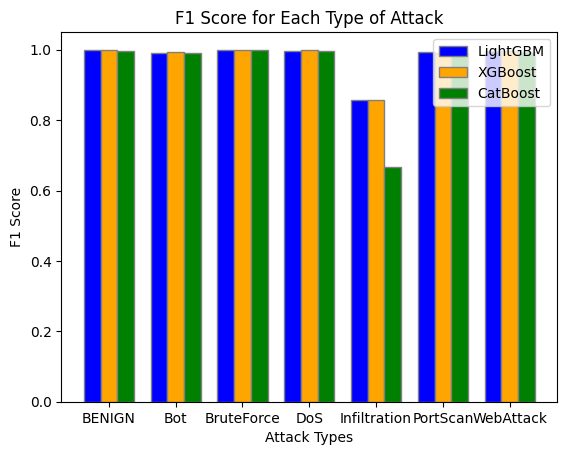

In [80]:
# F1 scores for each type of attack
lg_f1 = [0.99794998, 0.99094437, 1.0, 0.997543, 0.85714286, 0.99354839, 0.99778271]
xg_f1 = [0.99808639, 0.99222798, 1.0, 0.99836601, 0.85714286, 0.99137931, 0.99778271]
cb_f1 = [0.99726627, 0.99094437, 1.0, 0.99509804, 0.66666667, 0.99137931, 0.9944629]

# Attack types
attack_types = ['BENIGN', 'Bot', 'BruteForce', 'DoS', 'Infiltration', 'PortScan', 'WebAttack']

# Bar width
bar_width = 0.25

# Set positions for bars on X-axis
r1 = np.arange(len(attack_types))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create a grouped bar chart
plt.bar(r1, lg_f1, color='blue', width=bar_width, edgecolor='grey', label='LightGBM')
plt.bar(r2, xg_f1, color='orange', width=bar_width, edgecolor='grey', label='XGBoost')
plt.bar(r3, cb_f1, color='green', width=bar_width, edgecolor='grey', label='CatBoost')


# Add labels and title
plt.xlabel('Attack Types')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Type of Attack')
plt.xticks(r1 + bar_width, attack_types)

# Add legend
plt.legend()

# Show the plot
plt.show()


# **Conclusion**: The performance (F1-score) of the proposed LCCDE ensemble model on each type of attack detection is higher than any base ML model.